Import necessary libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder    # For encoding categorical variables
from sklearn.impute import SimpleImputer            # For handling missing values
from sklearn.preprocessing import MinMaxScaler     # For feature scaling
from sklearn.compose import ColumnTransformer      # For combining transformers
from sklearn.pipeline import Pipeline, make_pipeline   # For constructing pipelines
from sklearn.model_selection import train_test_split    # For splitting data into train and test sets
from sklearn.model_selection import GridSearchCV        # For hyperparameter tuning
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score   # For model evaluation
from sklearn.tree import DecisionTreeRegressor       # For Decision Tree regression
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV, Lasso   # For linear regression and its variants
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor    # For ensemble methods
import warnings     # For ignoring warnings
warnings.filterwarnings('ignore')   # Ignore warnings during code execution

In [2]:
df_train = pd.read_csv('/content/train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Count occurrences of each data type
print(df_train.dtypes.value_counts())

print(df_train.dtypes)

object     43
int64      35
float64     3
Name: count, dtype: int64
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [5]:
df_train.shape

(1460, 81)

In [6]:
# Split the dataset into features and target variable
X, y = df_train.drop('SalePrice', axis=1), df_train['SalePrice']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1998)

In [7]:
# Calculate and display the percentage of missing values in each column
missing_percentage = (X_train.isnull().sum() / len(X_train) * 100).loc[X_train.isnull().sum() > 0]
print(missing_percentage)

LotFrontage     16.866438
Alley           93.835616
MasVnrType      59.760274
MasVnrArea       0.684932
BsmtQual         2.568493
BsmtCond         2.568493
BsmtExposure     2.654110
BsmtFinType1     2.568493
BsmtFinType2     2.654110
Electrical       0.085616
FireplaceQu     47.174658
GarageType       4.794521
GarageYrBlt      4.794521
GarageFinish     4.794521
GarageQual       4.794521
GarageCond       4.794521
PoolQC          99.571918
Fence           80.222603
MiscFeature     95.976027
dtype: float64


In [8]:
# Drop columns with more than 30% missing data
X_train = X_train.drop(columns=missing_percentage[missing_percentage > 30].index)

# Print the updated DataFrame
print(X_train)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
768    769          20       RL         70.0     9100   Pave      Reg   
1102  1103          20       RL         70.0     7000   Pave      Reg   
816    817          20       RL          NaN    11425   Pave      IR1   
391    392          60       RL         71.0    12209   Pave      IR1   
747    748          70       RM         65.0    11700   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
224    225          20       RL        103.0    13472   Pave      Reg   
1188  1189          60       RL         68.0     8935   Pave      IR1   
897    898          90       RL         64.0     7018   Pave      Reg   
673    674          20       RL        110.0    14442   Pave      Reg   
840    841          70       RH          NaN    12155   Pave      IR1   

     LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
768          Lvl    AllPub    Inside  ... 

In [9]:
# Filter columns with missing percentages less than 30% and store their indices
columns_to_fill = missing_percentage[missing_percentage < 30].index

# Print the resulting column indices
print(columns_to_fill)

Index(['LotFrontage', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')


In [10]:
for column in columns_to_fill:
    if X_train[column].dtype == "float64" or X_train[column].dtype == "int64":
        X_train[column].fillna(X_train[column].mean(), inplace=True)
    else:

        X_train[column].fillna(X_train[column].mode()[0], inplace=True)
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
X_train.isnull().sum().sum()


0

In [12]:
X_train.Id.nunique()

1168

In [13]:
X_train.drop(columns=['Id'], inplace=True)

In [14]:
num_data = X_train.select_dtypes(include=np.number).columns.tolist()
cat_data = X_train.select_dtypes(exclude=np.number).columns.tolist()

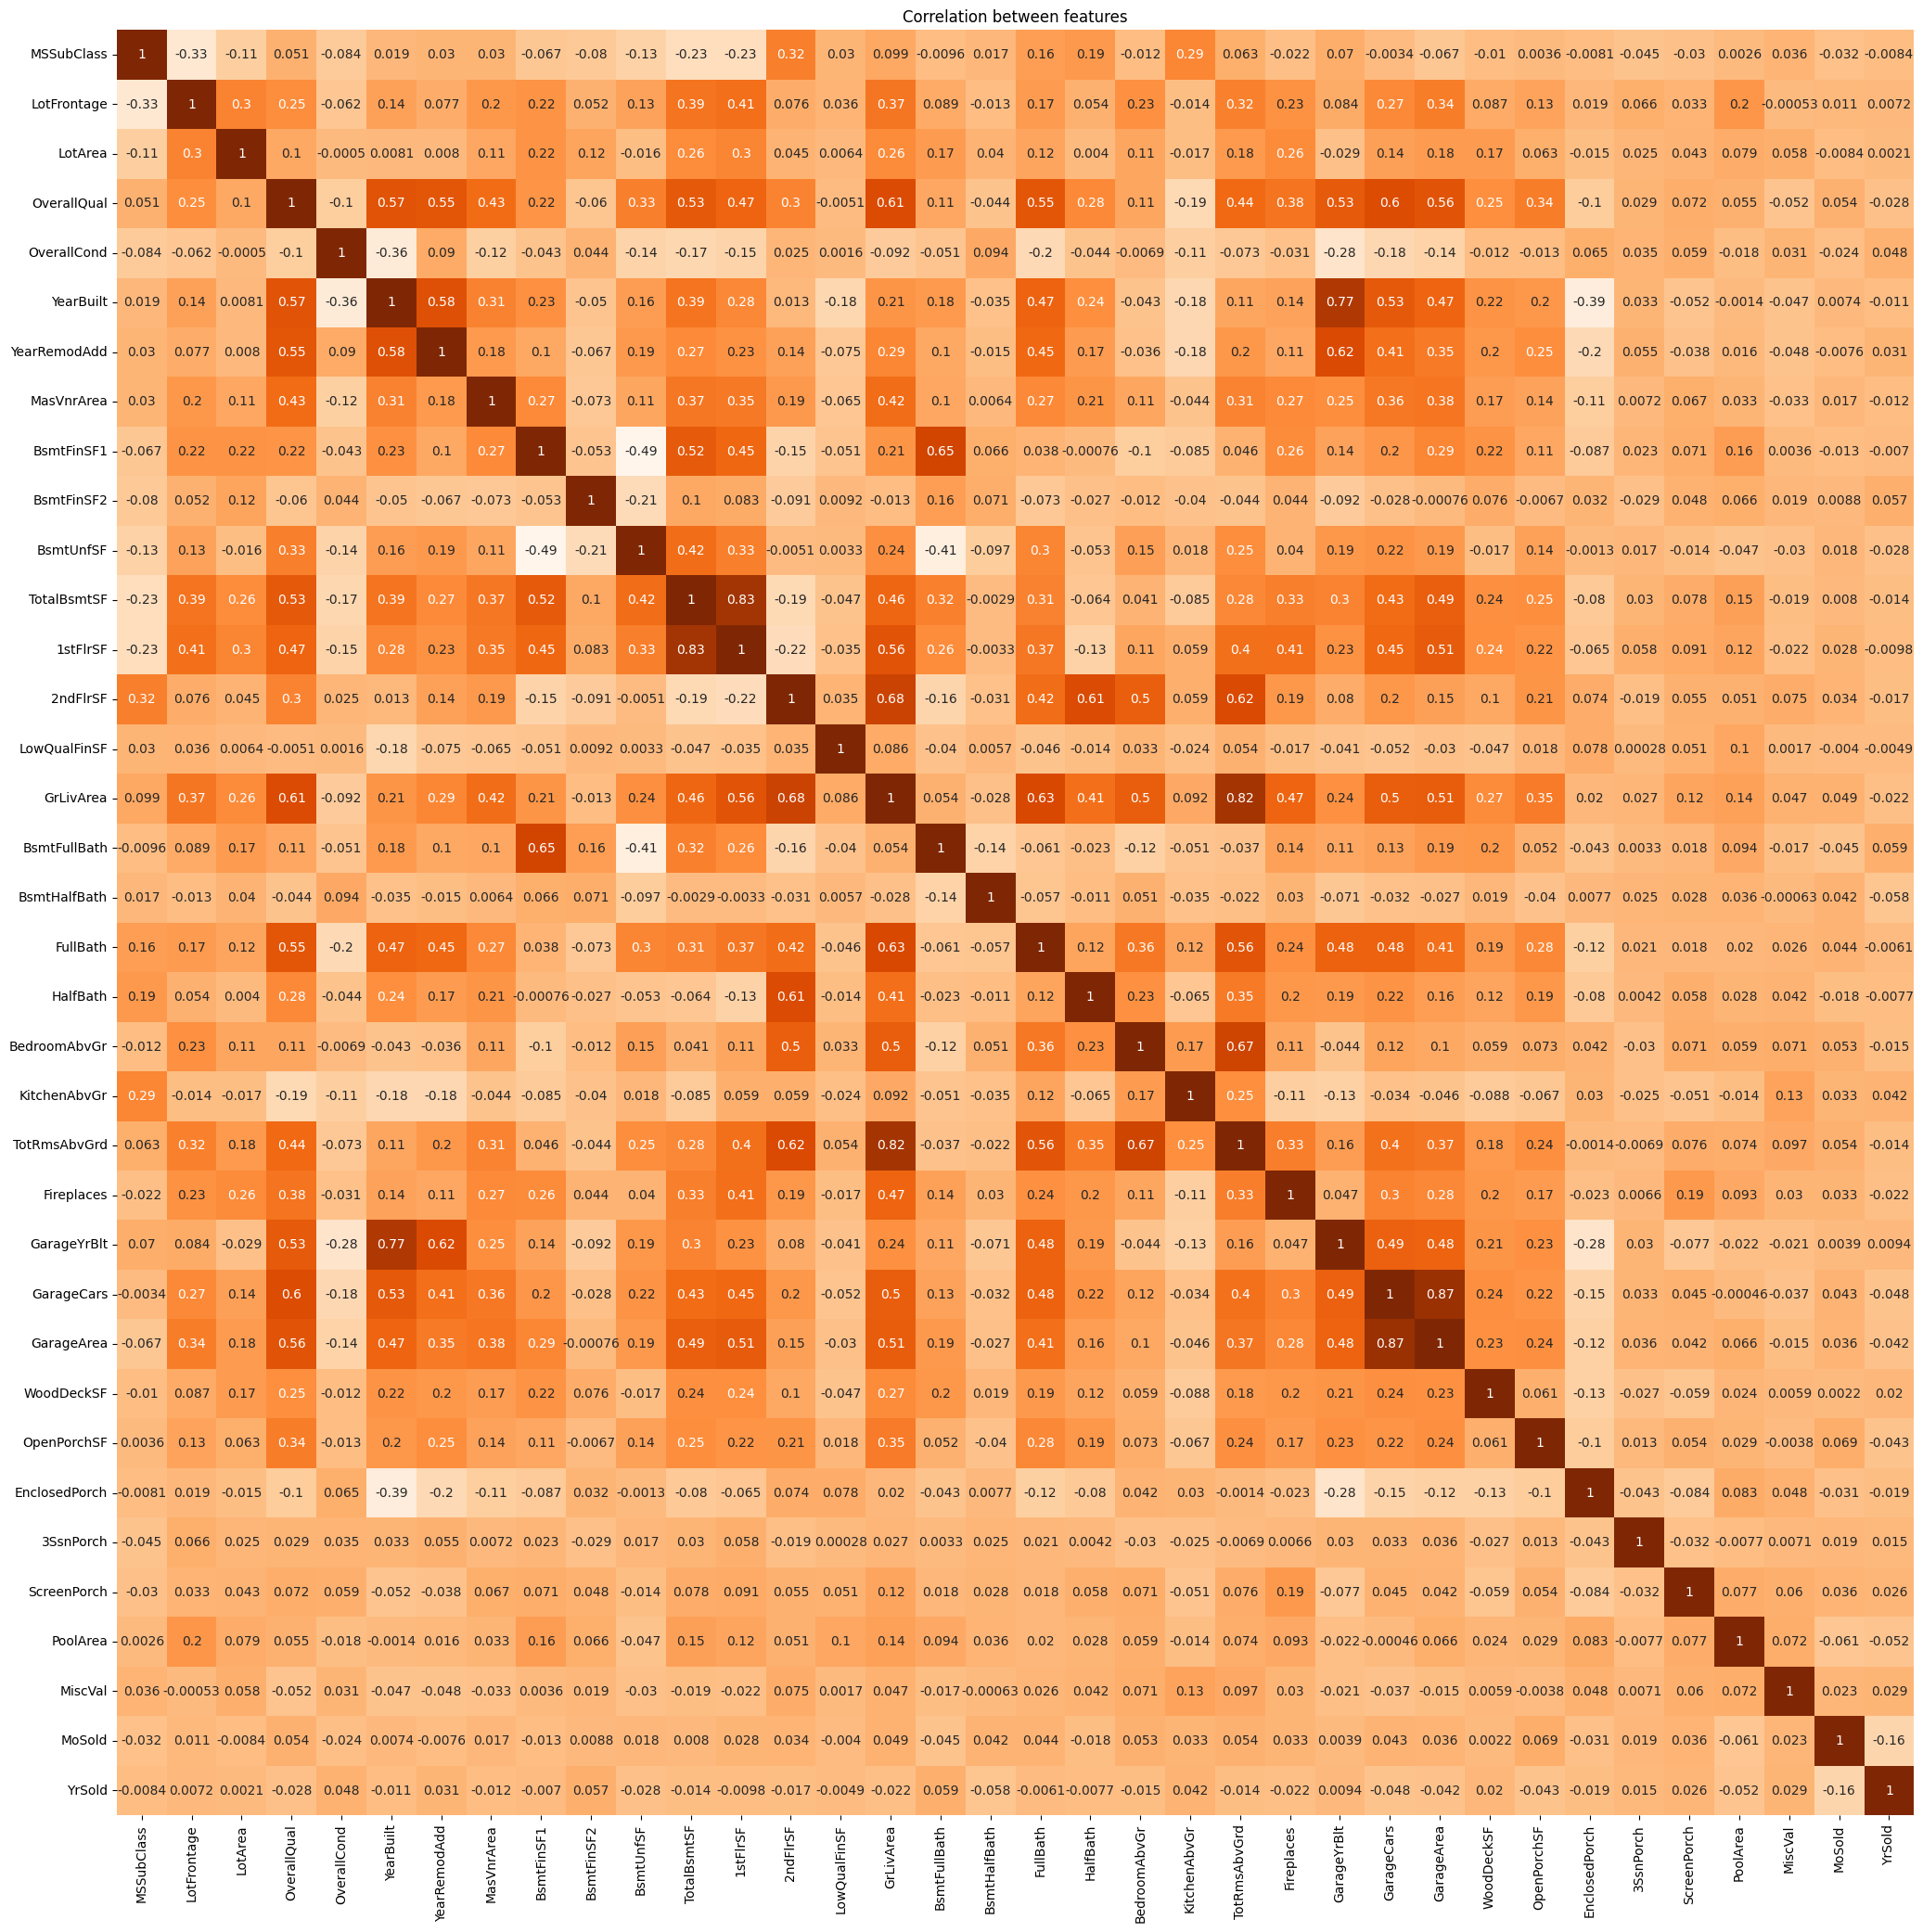

In [17]:
corr = X_train[num_data].corr()
plt.subplots(1,1, figsize=(25,25))
sns.heatmap(data=corr, cmap ='Oranges', annot = corr, cbar=None)
plt.title('Correlation between features')
plt.show()

In [18]:
num_data.remove('GarageArea')
num_data.remove('1stFlrSF')
num_data.remove('GrLivArea')
num_data.remove('BsmtFullBath')
num_data.remove('FullBath')
num_data.remove('HalfBath')
num_data.remove('TotRmsAbvGrd')
num_data.remove('GarageYrBlt')

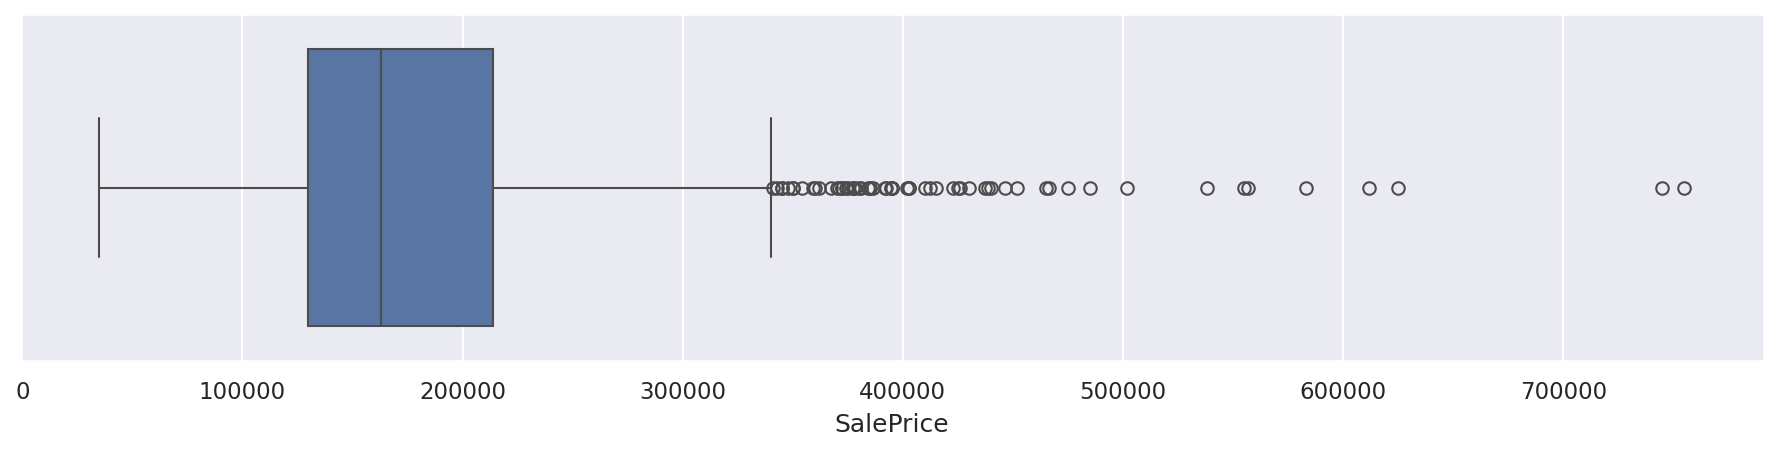

In [19]:
# Set the figure size and DPI globally for all seaborn plots
sns.set(rc={'figure.figsize':(15, 3), 'figure.dpi': 150})

# Create the boxplot
sns.boxplot(x=y)

# Set the plot orientation
plt.show()

In [20]:
def calculate_outlier_boundaries(data):
    # Calculate quartiles
    q1, q3 = np.percentile(data, [25, 75])

    # Calculate IQR
    iqr = q3 - q1

    # Define upper boundary for outliers
    upper_boundary = q3 + 1.5 * iqr

    return q1, q3, iqr, upper_boundary

# Calculate quartiles, IQR, and upper boundary for outliers
q1, q3, iqr, upper_boundary = calculate_outlier_boundaries(y)

# Print the results
print(f"q1: {q1}")
print(f"q3: {q3}")
print(f"iqr: {iqr}")
print(f"upper boundary for outliers: {upper_boundary}")

q1: 129975.0
q3: 214000.0
iqr: 84025.0
upper boundary for outliers: 340037.5


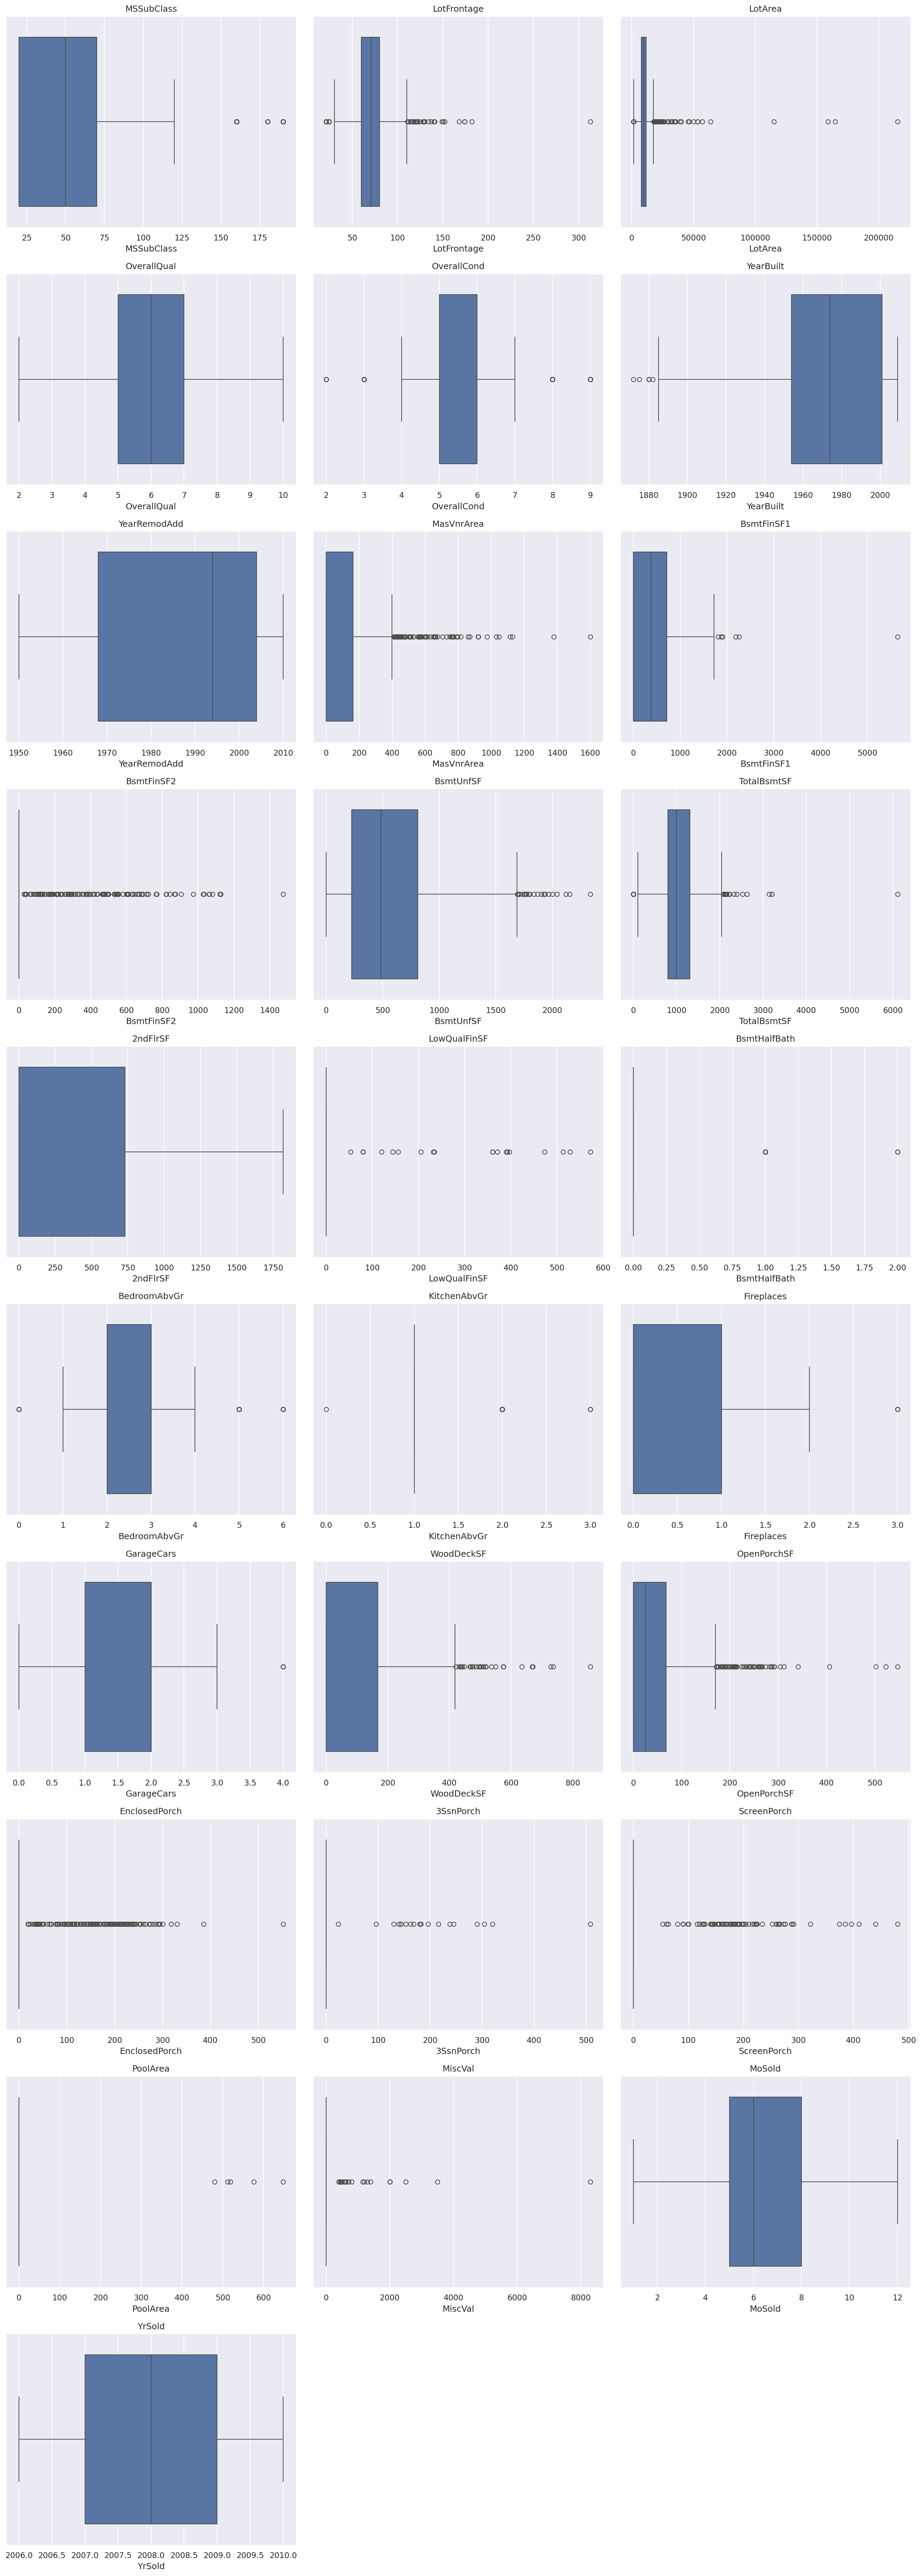

In [21]:
# Number of features to plot
n_features = len(num_data)

# Number of columns per row
n_cols = 3

# Calculate the number of rows needed
n_rows = -(-n_features // n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
for i, (feature, ax) in enumerate(zip(num_data, axes.flatten())):
    sns.boxplot(x=feature, data=X_train, ax=ax)
    ax.set_title(feature)
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

In [22]:
num_pipe = make_pipeline(SimpleImputer(strategy='mean'),MinMaxScaler())
cat_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'),
                         OneHotEncoder(handle_unknown='ignore'))

preprocessor= ColumnTransformer([
    ('num_pipe',num_pipe,num_data),
    ('cat_pipe',cat_pipe,cat_data)
])

preprocessor

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['MSSubClass', 'LotFrontage', 'LotArea',
                                  'OverallQual', 'OverallCond', 'YearBuilt',
                                  'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                                  'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                                  '2ndFlrSF', 'LowQualFinSF', 'BsmtHalfBath',
                                  'BedroomAbvGr', 'Kitchen...
                                  'LandContour', 'Utilities', 'LotConfig',
                                  'LandSlope', 'Neighborhood', 'Condition1',
                                  'Condition2', 'BldgType', 'HouseStyle',
                                  'RoofStyle', 'RoofMatl', 'Exterior1st',
                                  'Exterior2nd', 'ExterQual', 'ExterCond',
                                  'Foundation', 'BsmtQual', 'BsmtCond',
                                  'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'Heating', 'HeatingQC',
                                  'CentralAir', 'Electrical', 'KitchenQual',
                                  'Functional', ...])])

In [23]:
 def prediction(model):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Calculate evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print model name and evaluation metrics
    print(f"{model}")
    print(f"RMSE is {rmse}")
    print(f"MAE is {mae}")
    print(f"R2 is {r2}")

    # Return evaluation metrics
    return rmse, mae, r2

In [24]:
prediction(LinearRegression())
prediction(DecisionTreeRegressor(random_state=1998))
prediction(RandomForestRegressor(n_estimators=100, random_state=1998,n_jobs=-1))
prediction(GradientBoostingRegressor(random_state=1998))
prediction(RidgeCV())
prediction(ElasticNetCV())
prediction(LassoCV())
best_model = GradientBoostingRegressor(random_state=1998)
prediction(best_model)

LinearRegression()
RMSE is 30578.226470964135
MAE is 18367.415785125315
R2 is 0.8691538976957136
DecisionTreeRegressor(random_state=1998)
RMSE is 48009.4059226012
MAE is 29544.72602739726
R2 is 0.6774560735554238
RandomForestRegressor(n_jobs=-1, random_state=1998)
RMSE is 35370.29775472847
MAE is 20191.860273972605
R2 is 0.8249292322961923
GradientBoostingRegressor(random_state=1998)
RMSE is 30673.121756609784
MAE is 17833.25709244653
R2 is 0.8683405120675327
RidgeCV()
RMSE is 36509.219582715465
MAE is 20396.66016143143
R2 is 0.81347317246217
ElasticNetCV()
RMSE is 81549.65887767953
MAE is 54660.61539090562
R2 is 0.06936259949027457
LassoCV()
RMSE is 32071.13432896213
MAE is 18670.25492052933
R2 is 0.8560655189826071
GradientBoostingRegressor(random_state=1998)
RMSE is 30673.121756609784
MAE is 17833.25709244653
R2 is 0.8683405120675327


(30673.121756609784, 17833.25709244653, 0.8683405120675327)

In [26]:
df_test = pd.read_csv("/content/test.csv")
id = df_test['Id'].copy()
df_test = df_test.drop('Id', axis=1)
test_preprocessed = preprocessor.transform(df_test)
predictions = best_model.predict(test_preprocessed)
predictions_df = pd.DataFrame({
    'Id': id,
    'SalePrice': predictions
})
predictions_df.to_csv('predicted_prices_submission.csv', index=False)

print("Result SAVED")

Result SAVED


In [27]:
submission= pd.DataFrame(data = {'Id': range(1461,2920),
                                'SalePrice': predictions})
submission

,Id,SalePrice
0,1461,128061.842964
1,1462,165052.944591
2,1463,181032.271920
3,1464,181247.223635
4,1465,191281.801812
...,...,...
1454,2915,88632.379373
1455,2916,86894.953042
1456,2917,176435.431501
1457,2918,130018.308859


In [28]:
predictions_df.head()

,Id,SalePrice
0,1461,128061.842964
1,1462,165052.944591
2,1463,181032.271920
3,1464,181247.223635
4,1465,191281.801812
